In [1]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import re
import string
import emoji
from nltk.corpus import wordnet
from spellchecker import SpellChecker


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
comment_body = df['Comment']

In [5]:
comments=comment_body.to_numpy()

In [6]:
comments

array(['Love you sir!!',
       "Please make videos on..Midpoint circle drawing And Bresenham's circle drawing...",
       'I bought both of your courses on Udemy. You are a very talented teacher. Keep producing quality material. When is your Java course coming along? . I am looking forward to it.',
       ...,
       'wow. reading this slowly actually helped me see the extra info to condense this down even further, helping me understand what i read even more and the questions became second nature! THANK YOU!!',
       'Great video sir, really helped a lot.keep going👍 ..lots of respect',
       "Oh damn! u deserve a lot many subscribers than you have nevermind one day certainly it will reach millions all the very best :) Hi I'm preparing for CLAT exam, India, I'm facing lot of difficulties in RCs I really owe you for this video make more videos Two questions I have 1) Please suggest me how to reduce negatives and get a cent percent score in reading comprehension and critical reasoning 

In [7]:
def remove_punctuation(txt):
#     allowed_punctuations = string.punctuation.replace('?', '').replace('!', '').replace("'", '')
    allowed_punctuations = string.punctuation.replace('?', '').replace("'", '')

    txt_nopunc = "".join([c for c in txt if c not in allowed_punctuations])
    return txt_nopunc
def remove_multiple_spaces(txt):
    # Remove multiple spaces
    txt = re.sub(r'\s+', ' ', txt)
    return txt
def lemmatize_text(txt):
    lemmatizer = WorzdNetLemmatizer()
    tokens = word_tokenize(txt)
    lemmatized_tokens = []
    
    for token in tokens:
        pos = get_wordnet_pos(token)
        if pos:
            lemmatized_token = lemmatizer.lemmatize(token, pos=pos)
        else:
            lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)
    
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def remove_numbers_and_single_words(txt):
    # Remove numbers
    txt = re.sub(r'\d+', '', txt)
    
    # Remove single words
    txt = ' '.join([word for word in txt.split() if len(word) > 1])

    # Remove new line character
    txt = txt.replace('\n', '')
    return txt

def remove_urls(txt):
    # Remove URLs
    txt = re.sub(r'http\S+|www\S+|https\S+', '', txt)

    return txt
def remove_repeated(txt): 
    txt = re.sub(r'(.)\1+', r'\1', txt)
    return txt

In [8]:
stopwords_list = stopwords.words('english')
stopwords_list = [word for word in stopwords_list if word not in['no', 'not', 'how', 'what', 'which', 'who', 'whom', 'why', 'do', 'is', 'does', 'are', 'was', 'were', 'will', 'am', 'could', 'would', 'should', 'can', 'did', 'had', 'have', 'but', 'however', 'instead', 'yet', 'except']]

df['Comment'] = df['Comment'].str.lower()
df['Comment'] = df['Comment'].apply(remove_punctuation)
df['Comment'] = df['Comment'].apply(remove_multiple_spaces)
df['Comment'] = df['Comment'].apply(lambda x:remove_numbers_and_single_words(x))
df['Comment'] = df['Comment'].apply(lambda x: emoji.replace_emoji(x, ''))
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))
df['Comment'] = df['Comment'].apply(lemmatize_text)
df['Comment'] = df['Comment'].apply(lambda x:remove_urls(x))
df['Comment'] = df['Comment'].apply(lambda x:remove_repeated(x))
df = df[df['Comment'].str.strip().astype(bool)]

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df["Predicted Class"].unique()

array(['positive', 'imperative', 'interrogative', 'miscellaneous',
       'corrective', 'negative'], dtype=object)

In [11]:
predicted_class = df['Predicted Class']
# Define the desired class labels and their corresponding encoded values
class_labels = ['positive', 'negative', 'corrective', 'interrogative', 'imperative','miscellaneous']
encoded_labels = [1, 2, 3, 4, 5,6]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Fit the label encoder on the class labels and their encoded values
label_encoder.fit(class_labels)

# Map the predicted class to the corresponding encoded values
encoded_predicted_class = label_encoder.transform(predicted_class)

# Create a mapping dictionary for the encoded labels
label_mapping = dict(zip(class_labels, encoded_labels))

# Map the encoded values to the desired labels
mapped_predicted_class = [label_mapping[label] for label in predicted_class]

# Create a new column 'Label' based on the mapped predicted class
df['Label'] = mapped_predicted_class

In [12]:
df.to_csv('clean_dataset2.csv', index=False)

In [13]:
df

,Comment,Predicted Class,Label
0,love sir,positive,1
1,please make video onmidpoint circle draw brese...,imperative,5
2,bought course udemy be talented teacher kep pr...,interrogative,4
3,thank much realy get first video algorithm wit...,positive,1
4,hope be ok everything go muslim indea,miscellaneous,6
...,...,...,...
9995,be gold absolute peach video but mes last two ...,positive,1
9996,be helpful how decode logical context easily ?...,interrogative,4
9997,wow reading slowly actualy help se extra info ...,positive,1
9998,great video sir realy help lotkep go lot respect,positive,1


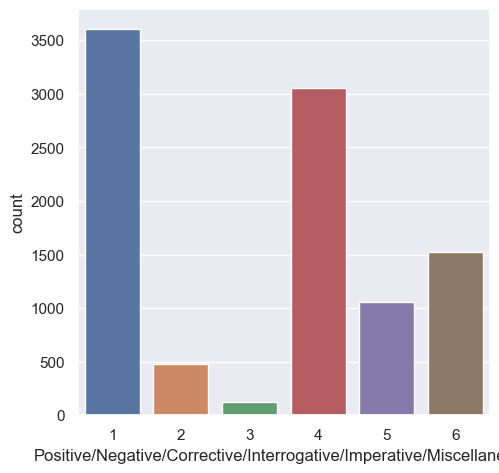

In [14]:
#Plot total number of sentiment

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,5.27)})

plt.subplot(1,2,1)
news_plt = sns.countplot(x = 'Label', data = df)
news_plt.set_xlabel('Positive/Negative/Corrective/Interrogative/Imperative/Miscellaneous')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(encoding='utf-8')
X = vectorizer.fit_transform(df['Comment']).toarray()
terms = vectorizer.get_feature_names() if hasattr(vectorizer, 'get_feature_names') else vectorizer.vocabulary_.keys()
print(len(terms))

10078


In [17]:
X.shape

(9853, 10078)

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
terms

dict_keys(['love', 'sir', 'please', 'make', 'video', 'onmidpoint', 'circle', 'draw', 'bresenham', 'bought', 'course', 'udemy', 'be', 'talented', 'teacher', 'kep', 'produce', 'quality', 'material', 'java', 'come', 'along', 'lok', 'forward', 'thank', 'much', 'realy', 'get', 'first', 'algorithm', 'without', 'explanation', 'lol', 'hope', 'ok', 'everything', 'go', 'muslim', 'indea', 'another', 'great', 'abdul', 'do', 'have', 'take', 'note', 'se', 'which', 'helpful', 'no', 'idea', 'what', 'one', 'but', 'clear', 'sugestion', 'posible', 'can', 'provide', 'link', 'github', 'implementation', 'wel', 've', 'try', 'watch', 'implement', 'every', 'time', 'mes', 'want', 'croscheck', 'reference', 'code', 'would', 'help', 'lot', 'post', 'you', 'so', 'absolute', 'genius', 'extremely', 'understand', 'content', 'profesor', 'university', 'btw', 'probably', 'publish', 'dp', 'how', 'create', 'formula', 'problem', 'diferent', 'kind', 'np', 'complete', 'not', 'talk', 'prove', 'detail', 'use', 'reduction', 'it',

In [20]:
y = df['Label']

In [21]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [22]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# train_size=0.6


# Splitting the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)

# Splitting the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.2, random_state=0)

# Printing the shapes of the datasets
print("Training set - X:", X_train.shape)
print("Training set - y:", y_train.shape)
print("Validation set - X:", X_valid.shape)
print("Validation set - y:", y_valid.shape)
print("Test set - X:", X_test.shape)
print("Test set - y:", y_test.shape)

Training set - X: (12976, 10078)
Training set - y: (12976,)
Validation set - X: (6921, 10078)
Validation set - y: (6921,)
Test set - X: (1731, 10078)
Test set - y: (1731,)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Validation Accuracy: 0.7845687039445167
Test Accuracy: 0.7966493356441363
              precision    recall  f1-score   support

           1       0.86      0.81      0.84       291
           2       0.84      0.93      0.88       299
           3       0.84      1.00      0.91       276
           4       0.62      0.69      0.65       264
           5       0.77      0.79      0.78       315
           6       0.88      0.55      0.67       286

    accuracy                           0.80      1731
   macro avg       0.80      0.80      0.79      1731
weighted avg       0.80      0.80      0.79      1731



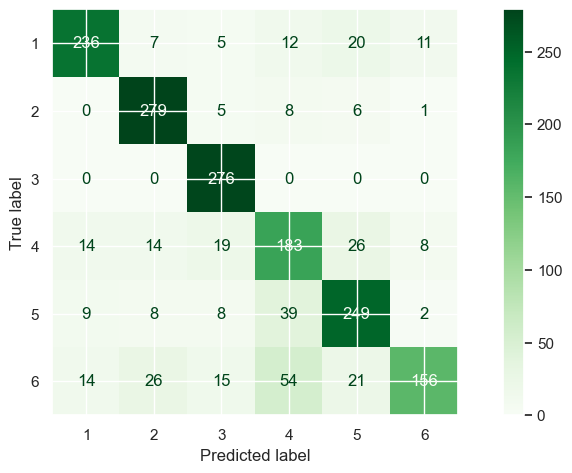

In [26]:
# Create an instance of the Multinomial Naive Bayes model
MNB = MultinomialNB()

# Train the model on the training set
# MNB.fit(X_train_smote, y_train_smote)
MNB.fit(X_train, y_train)
# Evaluate the model on the validation set
valid_accuracy = MNB.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = MNB.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_MNB = MNB.predict(X_test)
print(classification_report(y_test, pred_MNB)) 
cm = confusion_matrix(y_test, pred_MNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MNB.classes_)
disp.plot(cmap='Greens')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.8527669411934692
Test Accuracy: 0.8561525129982669
              precision    recall  f1-score   support

           1       0.88      0.77      0.82       291
           2       0.90      0.94      0.92       299
           3       0.97      1.00      0.98       276
           4       0.79      0.76      0.77       264
           5       0.89      0.82      0.85       315
           6       0.73      0.84      0.78       286

    accuracy                           0.86      1731
   macro avg       0.86      0.86      0.86      1731
weighted avg       0.86      0.86      0.86      1731



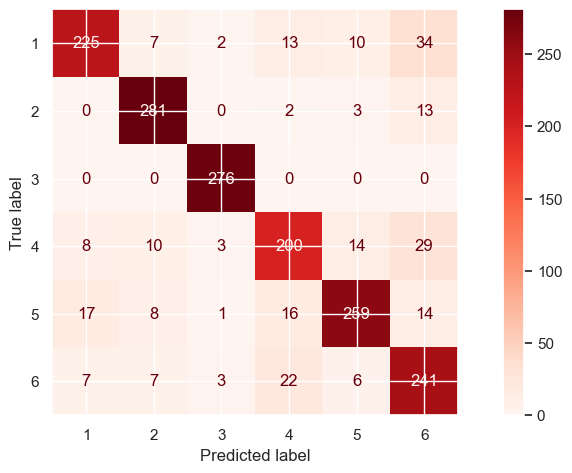

In [27]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
valid_accuracy = LR.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = LR.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR)) 
cm = confusion_matrix(y_test, pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Reds')
plt.show()

Validation Accuracy: 0.7899147522034388
Test Accuracy: 0.803004043905257
              precision    recall  f1-score   support

           1       0.76      0.77      0.76       291
           2       0.85      0.84      0.85       299
           3       0.95      0.99      0.97       276
           4       0.67      0.66      0.67       264
           5       0.87      0.81      0.84       315
           6       0.71      0.74      0.72       286

    accuracy                           0.80      1731
   macro avg       0.80      0.80      0.80      1731
weighted avg       0.80      0.80      0.80      1731



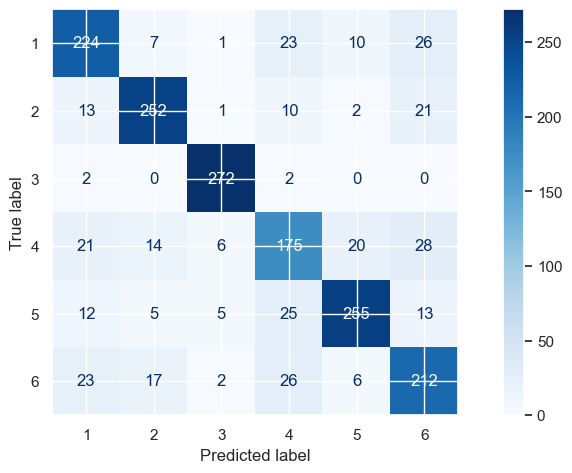

In [28]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
valid_accuracy = DT.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = DT.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT)) 
cm = confusion_matrix(y_test, pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues')
plt.show()

Validation Accuracy: 0.8966912295910996
Test Accuracy: 0.9058347775852109
              precision    recall  f1-score   support

           1       0.92      0.80      0.86       291
           2       0.94      0.96      0.95       299
           3       1.00      0.99      0.99       276
           4       0.84      0.85      0.85       264
           5       0.95      0.93      0.94       315
           6       0.80      0.90      0.84       286

    accuracy                           0.91      1731
   macro avg       0.91      0.91      0.91      1731
weighted avg       0.91      0.91      0.91      1731



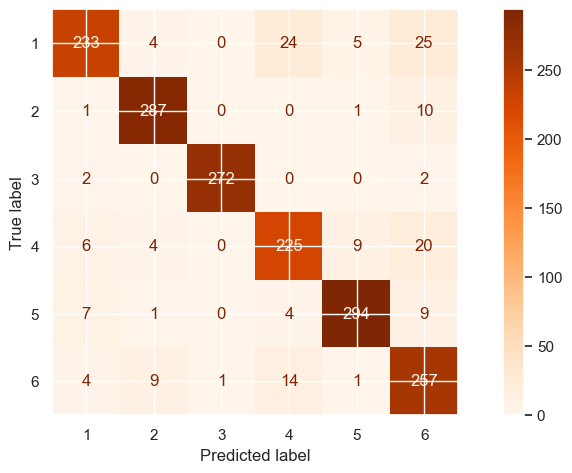

In [29]:
RF = RandomForestClassifier(max_depth=200,random_state=0)
RF.fit(X_train, y_train)
valid_accuracy = RF.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = RF.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_RF = RF.predict(X_test)
print(classification_report(y_test, pred_RF)) 
cm = confusion_matrix(y_test, pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Oranges')
plt.show()

Validation Accuracy: 0.7868805085970235
Test Accuracy: 0.803004043905257
              precision    recall  f1-score   support

           1       0.99      0.47      0.63       291
           2       0.96      1.00      0.98       299
           3       0.99      1.00      0.99       276
           4       0.99      0.38      0.55       264
           5       0.95      0.94      0.94       315
           6       0.48      0.99      0.65       286

    accuracy                           0.80      1731
   macro avg       0.89      0.80      0.79      1731
weighted avg       0.89      0.80      0.80      1731



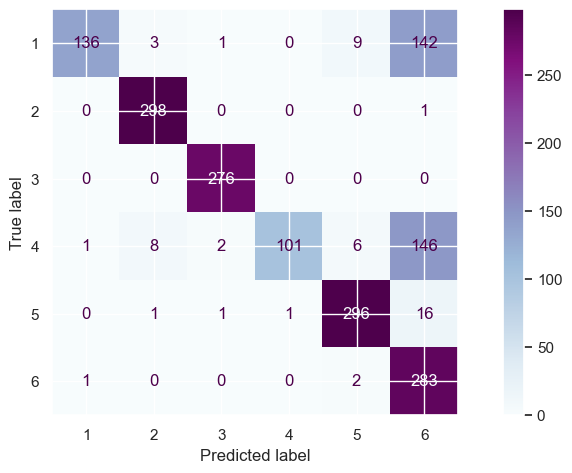

In [30]:
KNN= KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
valid_accuracy = KNN.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = KNN.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_KNN = KNN.predict(X_test)
print(classification_report(y_test, pred_KNN)) 
cm = confusion_matrix(y_test, pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot(cmap='BuPu')
plt.show()

Validation Accuracy: 0.913596301112556
Test Accuracy: 0.9248989023685731
              precision    recall  f1-score   support

           1       0.86      0.86      0.86       291
           2       0.99      0.99      0.99       299
           3       1.00      1.00      1.00       276
           4       0.85      0.91      0.88       264
           5       0.98      0.89      0.93       315
           6       0.88      0.90      0.89       286

    accuracy                           0.92      1731
   macro avg       0.93      0.93      0.92      1731
weighted avg       0.93      0.92      0.93      1731



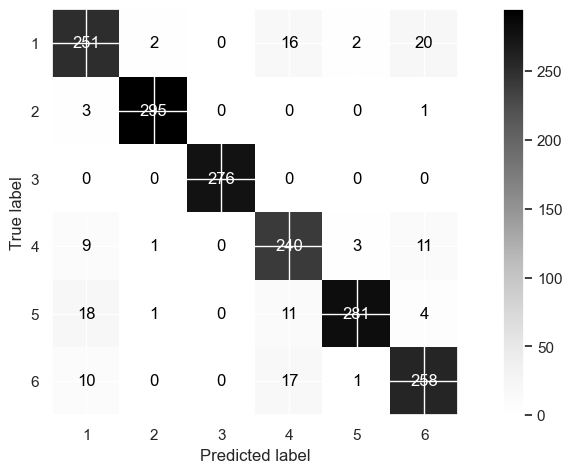

In [31]:
SVM = svm.SVC(decision_function_shape='ovo')
SVM.fit(X_train, y_train)
valid_accuracy = SVM.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = SVM.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_SVM = SVM.predict(X_test)
print(classification_report(y_test, pred_SVM)) 
cm = confusion_matrix(y_test, pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot(cmap='Greys')
plt.show()